# Selecting Random Points  

One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

C:\Users\Parrot\AppData\Local\Temp\ipykernel_61768\3173130897.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  meat_per_day[i] = max(200 + (hemoglobin[i] - 135)*np.random.normal(loc=5, scale = 5, size=1), 0)


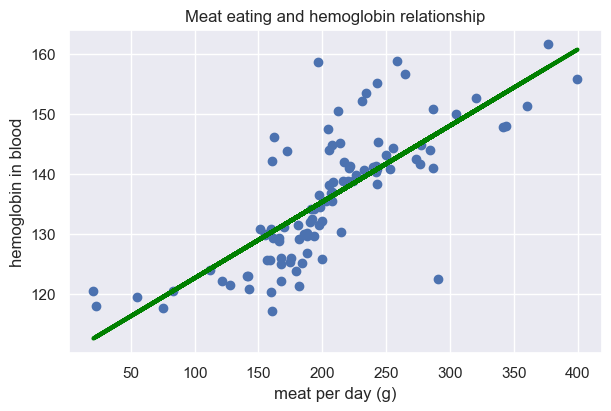

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import pandas as pd
from scipy import stats


# ToDo: Generate 100 x 2 sample data and plot the data (scatter plot)
# also draw a linear regression
# data1 represents hemoglobin in blood in healthy population, average 135 units, sd 10
hemoglobin = np.random.normal(loc=135, scale=10, size=100)

# data2 represents amount of meat eaten in a day, avrg 150 grams per day, but positive correlation to hemoglobin
meat_per_day = np.ones(100)
for i in range(len(hemoglobin)):
    meat_per_day[i] = max(200 + (hemoglobin[i] - 135)*np.random.normal(loc=5, scale = 5, size=1), 0)

# create a matrix with 100 rows and 2 columns
# notice that first letter is row index, second is column index
# and that first column 0 is hemoglobin, second column 1 is meat
matrix_hemoglobin_to_meat = np.column_stack([hemoglobin, meat_per_day])
# print(matrix_hemoglobin_to_meat[:, 0])

# create a linear regression function
def linearRegression(data_x_axis, data_y_axis):
    slope, intercept, r, p, std_err = stats.linregress(data_x_axis, data_y_axis)
    return slope * data_x_axis + intercept

# save linear regression model
lm = linearRegression(matrix_hemoglobin_to_meat[:, 1], matrix_hemoglobin_to_meat[:, 0])


fig1, ax1 = plt.subplots(figsize=(6,4), layout="constrained")
ax1.scatter(matrix_hemoglobin_to_meat[:, 1], matrix_hemoglobin_to_meat[:, 0])
ax1.set_title("Meat eating and hemoglobin relationship")
ax1.set_xscale("linear")
ax1.set_xlabel("meat per day (g)")
ax1.set_ylabel("hemoglobin in blood")
ax1.grid(True, color="white")
ax1.plot(matrix_hemoglobin_to_meat[:, 1], lm, color="green", linewidth=3)
plt.show()



    




Let’s use fancy indexing to select 20 random points. We’ll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [97]:
# ToDo: select 20 random indecis
# ToDo: select the random points from the dataset and print the items selected

# so, what this guide means, is to use 20 random rows of matrix as a sample
random_indices = np.random.choice(len(hemoglobin), 20, replace=False)
sample1 = matrix_hemoglobin_to_meat[random_indices, :]
print(sample1)


[[138.75099641 216.51526767]
 [141.01083575 286.82649699]
 [144.77416672 207.33066178]
 [135.54237914 207.74164366]
 [141.68268335 276.62509397]
 [123.95958482 111.74553527]
 [122.11822236 121.83855608]
 [129.37417461 165.95585895]
 [121.45476028 127.58989769]
 [126.03281654 175.55829467]
 [138.82642801 223.72455262]
 [119.44756535  54.71771982]
 [147.87267698 341.64369408]
 [156.69546964 264.39603977]
 [144.80316457 277.39820086]
 [121.38527733 181.98493999]
 [122.94805343 141.39057793]
 [122.9918874  141.89484417]
 [129.237106   181.39570253]
 [142.45878854 273.48564954]]


Now to see which points were selected, let’s over-plot large circles at the locations of the selected points

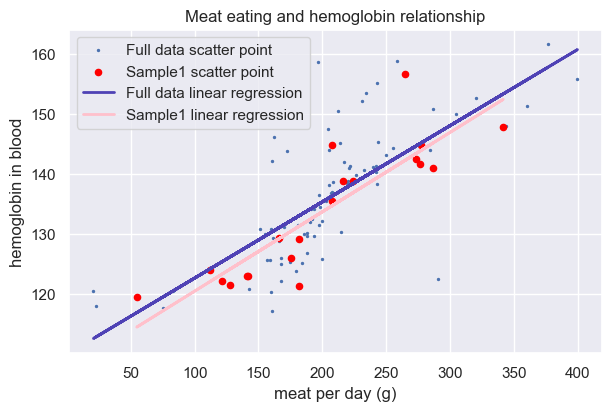

In [98]:
# ToDo: plot the dataset plus selected smaples

# linear regression model2 for the sample:
lm_sample1 = linearRegression(sample1[:, 1], sample1[:, 0])

fig2, ax2 = plt.subplots(figsize=(6,4), layout="constrained")
# draw in the full data with small blue dots
ax2.scatter(matrix_hemoglobin_to_meat[:, 1], matrix_hemoglobin_to_meat[:, 0], s=2, label="Full data scatter point")
ax2.set_title("Meat eating and hemoglobin relationship")
ax2.set_xscale("linear")
ax2.set_xlabel("meat per day (g)")
ax2.set_ylabel("hemoglobin in blood")
ax2.grid(True, color="white")
# draw in the sample data with red large dots
ax2.scatter(sample1[:, 1], sample1[:, 0], color="red", s=20, label="Sample1 scatter point")
# full data linear regression line
ax2.plot(matrix_hemoglobin_to_meat[:, 1], lm, color="#4f42b5", linewidth=2, label="Full data linear regression")
# sample data linear regression line
ax2.plot(sample1[:, 1], lm_sample1, color="pink", linewidth=2, label="Sample1 linear regression")
ax2.legend(loc="upper left")
plt.show()


> This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models, and in sampling approaches to answering statistical questions.